# Lab1: Introduction to Tweepy, Twitter for Python
## Due: Midnight, September 11th
In this lab, we will introduce Tweepy, an open-sourced Python Package to communicate with Twitter platform and use its API. We will teach you the how to use Tweepy to access Twitter data, such as user profiles and following list. In lab 2, we will further use Tweepy to collect Twitter network. We provide examples and most of the code for you. You will need to fill in some of the codes. You can also read the domcumentation of Tweepy to learn more about it: https://tweepy.readthedocs.io/en/latest/.


## Save Your Notebook! 
- Click on File (upper left corner), Select “Save and Checkpoint”.
- Important: You may loose your modification to a notebook if you do not Save it explicitly.
- Advice: Save and Checkpoint often.  


## Submission
- Please follow the instructions and finish the exercises.
- After you finish the lab, please Click on File, Select “Download as”, Choose Notebook (.ipynb)
- Please also Click on File, Select ``Print'', and choose ``Save as PDF''
- Submit both the Notebook file and the PDF File as your submission for Lab 1.

Note that we will grade your PDF file, make sure that your answers are clearly shown in the PDF file. We will run the Notebook file if your code is difficult to understand.

# 1. Preparation
Since this is the first time we use Colab, we need to do some preparation.



# 1.1 Connect this Colab notebook with your Google Drive
In this lab and following labs, we will need to save and load files. One of the most simple way to transfer files with the cloud machine of Colab is to mount the goole drive with the following code so that you can easily save your file to and load file from Goole drive <br>
* When you first time run this code, you may revieve this message:
<img src="https://drive.google.com/uc?export=view&id=1sWVQX-dRthuS5rPwHxnY92cXHafkO2RC" width="900" align="center"/>
* Please click the URL. You will then find the following message which shows your authorization code:
<img src="https://drive.google.com/uc?export=view&id=1GlQOxc-EiAGDeDy06DPio98FJaV-LCSZ" width="400" align="center"/>
* Finally copy the code to the box and press "Enter". You might want to manually copy the code. Somehow when you use the copy button, it might cause some problem. If successful, you should find ``Mounted at /content/drive/'' as shown below
<img src="https://drive.google.com/uc?export=view&id=1lBqoNyvOzC0QRqL5D74J5lxlZaSgjDG9" width="900" align="center"/>


In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Then your google drive will be mounted to this cloud machine. <br>
We could use following commands to set the google drive as our working directory and present the files and folders in the google drive.

**Set location of the google drive as the working directory**

In [2]:
cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


**List all the files and folders in your google drive**

In [3]:
!ls

DS402


# 1.2. Install Tweepy
Tweepy could be easily installed with pip. In CoLab Notebook, run the following code and the tweepy will be automatically installed. You may need wait for a few seconds for the installation. Most of the time, Tweepy should have already been installed.

In [4]:
!pip install tweepy

# 1.3. Install the requirement packages for this notebook
Apart from tweepy, several packages are also used here for visualization. 
- geopy is used to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.
- matplotlib is used to plot the figure
- 
Run this following code to install them. It takes **around five minutes to be installed**.


In [5]:
!pip install geopy
!pip install matplotlib
!apt install proj-bin libproj-dev libgeos-dev
!pip install --user git+https://github.com/matplotlib/basemap.git
    
print('finish installing the packages')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-6q_2fk8q
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-6q_2fk8q
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756181 sha256=535937ad1cf99fdbee08b01daca5429eba62aebb3c7d108299f8a3d21ce71db2
  Stored in directory: /tmp/pip-ephem-wheel-cache-b6d5upo6/wheels/3f/f3/56/de548b66967d0d661612b7618022e2c0d4b86b9a638cf6ccf3
Successfully built basemap
finish installing the packages


# 1.4 Restart the notebook runtime and re-run all the previous cells 
In order to make the updates valid, we need to **restart** the notebook book and **re-run** the above cells. <br>
* The restart button is here as it shown: <br>
<img src="https://drive.google.com/uc?export=view&id=1ty6YEFaHnH4JwyYiaqS9vmlisHeB5da8" width="400" align="center"/>


* After re-running the installation cells you would receive the following messages with warnings in red:
<img src="https://drive.google.com/uc?export=view&id=1fHb71_9UlSoa6EZPJbbD9ma8DD1efTvX" width="600" align="center"/>

# 1.4. Create Twitter API Authentication Credentials
Only tweepy is not enough for us to request information from twitter platform. Actually, tweepy is only a package which wraps the Twitter API for easier implement. And We are required to create the **authentication credentials** to use the API. These credentials are four text string:
1. Consumer key
2. Consumer secret
3. Access token
4. Access secret

You should already have applied the Twitter Developer Account and created apps. If not, please follow the insturctions for applying Twitter Developer Account.

# 2. Using Tweepy
After attaining the authentication credentials, then we can set up teepy for crawling useful information.
## 2.1. Authentication
Two types of authentication: OAuth 1a and OAuth 2 are used in twitter. Here we only need OAuth 2 Authentication. <br>
We can finish the OAuth 2 authentication as the following code presents:

## Exercise 1
The overall code is to build an api object is shown here. <br>
Please fill in your CONSUEMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN and ACCESS_TOKEN_SECRET into the code and run it. <br>
The expected output should be: `Authentication OK`

In [6]:
import tweepy

# replace with your own tokens
CONSUMER_KEY = "tzIGwGPCwDRpbGq7hRkOK2sZd"
CONSUMER_SECRET = "ihciKPu5edHO0iiDvvXKnolVwLfNIlLAK7Nnu0sp76qv2geER7"
ACCESS_TOKEN = "1304306874746109952-rjtYXR57m1bDJx0OHu6CihfM6MHM8a"
ACCESS_TOKEN_SECRET = "0vJyrlokqDurs7hKosMeZaZfQPfKxLQaVFqcQ2IlPv2rk"


# Authenticate to Twitter
auth = tweepy.OAuthHandler(consumer_key=CONSUMER_KEY, consumer_secret=CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)

# build a api object, and the introduction about the rate limit will be cover in next lab
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


## 2.2 Get profile
The following codes are used to crawl user profiles. The profile is stored in a dictionary, which covers fundamental attributes such as **id**, **screen_name** and **created_at**. The detailed description could be find in this [link](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object).

In [7]:
# The eaist way to attatin your own profile call this function:
own_profile = api.me()

# own profile_is a user object, we can attain the attributes by calling own_profile.screen_name
print("own screen name: {}".format(own_profile.screen_name))

# The metadata is all reserved in json object (here is a dictionary).
# We can also get the attribute through the metadata in this way: own_profile._json["screen_name"]
print("The {} json file content:".format(own_profile._json["screen_name"]))
own_profile._json

own screen name: wei_haichen
The wei_haichen json file content:


{'contributors_enabled': False,
 'created_at': 'Fri Sep 11 06:32:58 +0000 2020',
 'default_profile': True,
 'default_profile_image': True,
 'description': '',
 'entities': {'description': {'urls': []}},
 'favourites_count': 0,
 'follow_request_sent': False,
 'followers_count': 0,
 'following': False,
 'friends_count': 0,
 'geo_enabled': False,
 'has_extended_profile': True,
 'id': 1304306874746109952,
 'id_str': '1304306874746109952',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 0,
 'location': '',
 'name': 'Haichen Wei',
 'needs_phone_verification': False,
 'notifications': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 'profile_background_image_url_https': None,
 'profile_background_tile': False,
 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png',
 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.

### short explanation
Please read the above output. The own_profile._json is in json format with key:value paris. You can use own_profile._json[key] to retrive the value. For example, to get the description, you can use own_profile._json['description']

## Exercise 2: Print the number of followers and friends of your own twitter account
In addition to screen_name, followers_count and friends_count are included in the user profiles. <br>
Please list the count of followers and friends_count presented in your own profile (You could choose other public users if you have privacy concern).<br>
The output should be in this format: <br>
`The followers_count of user ** is XXXX.` <br>
`The friends_count of user ** is XXXX.`

In [28]:
profile1 = api.get_user("GovernorTomWolf")
print(profile1.screen_name)
print("The followers_count of user " + profile1._json['screen_name'] + ' is ' + str(profile1._json["followers_count"]))
print("The friends_count of user " + profile1._json['screen_name'] + " is " + str(profile1._json["friends_count"]))

GovernorTomWolf
The followers_count of user GovernorTomWolf is 218989
The friends_count of user GovernorTomWolf is 1108


In [9]:
# You can also input other user's id/user_id/screen_name to get their profile
# For example
profile = api.get_user("realDonaldTrump")
print(profile.screen_name)

realDonaldTrump


## Save the profile with json
The user profile is sent to us from twitter in json format. We can save this in json file with json package: <br>
**Attention**: When you save the user profile, you are required to **save profile._json** which is the metadata of the profile

In [10]:
import json # import necessary package
import os

# build a directory to save the file
# /content/drive/My Drive/DS402/ refers to the DS402 folder we have created in the google drive.
directory = "/content/gdrive/My Drive/DS402/results"

if(not os.path.exists(directory)):
    os.makedirs(directory)
    print("{} has been added".format(directory))
else:
    print("{} already existed".format(directory))
    
# save the user profile
own_profile_path = os.path.join(directory,"{}_profile.json".format(profile.screen_name))
with open(own_profile_path,"w") as f:
    json.dump(profile._json,f)
    print("{} has been saved".format(own_profile_path))

/content/gdrive/My Drive/DS402/results already existed
/content/gdrive/My Drive/DS402/results/realDonaldTrump_profile.json has been saved


### Short Explanation
* Since the google drive is mounted on `/content/gdrive`, saving files in `/content/gdrive/My Drive/DS402/results` is actually saving files in your google drive. 
* Now you should see the folder named results and the file realDonaldTrump_profile.json in your google drive folder: `My Drive/DS402/results` <br>
<img src="https://drive.google.com/uc?export=view&id=1RmnszjpJ_Ph8BDENkpgVLnVpBe7aqtf4" width="400" align="center"/>

**Please check your google drive folder.**

## Reload the saved files

In [11]:
with open(own_profile_path,'r') as f:
    profile = json.load(f)
    print("{} profile has been loaded".format(profile["screen_name"]))

realDonaldTrump profile has been loaded


# 2.3 Get user friends and followers
In this subsection, we show an example of crawling friends/followers of Donald Trump. Some exercises are required to complete. <br>
 **Be sure not to run this module too many times, because it easily hits the rate limit (api.friends and api.followers: up to 15 requests per 15 minutes).**

## 2.3.1 Basic functions
1. api.friends: crawl the the user's friends profiles
2. api.followers: crawl the user's followers profiles 

Here is an example :

In [12]:
# get firends with user_id/screen_name, the max count you can set is 200

screen_name = "realDonaldTrump" # You can replace the id/user_id/screen_name to any user's screen_name
friends = api.friends(screen_name=screen_name, count=200)  
print("The number of the collected friends profiles is: {}".format(len(friends)))

# show the first 10 screen_name of the friends of Trump
print("The first 10 collected friends' screen names are:")
for friend in friends[:10]:
    print(friend.screen_name)

# get followers with user_id/screen_name, the max count you can set is 200
followers = api.followers(screen_name=screen_name, count=200)
print("\nThe number of the collected followers profiles is: {}".format(len(followers)))
print("The first 10 collected followers' screen names are:")
for follower in followers[:10]:
    print(follower.screen_name)


The number of the collected friends profiles is: 50
The first 10 collected friends' screen names are:
GOPLeader
senatemajldr
MarkMeadows
kimguilfoyle
JudgeJeanine
Jim_Jordan
MariaBartiromo
VP
GOPChairwoman
parscale

The number of the collected followers profiles is: 200
The first 10 collected followers' screen names are:
GageBassham55
turklake
AboodOtoom13
GertThorin
CharbelAntoni15
Poojash17400405
Federic54200710
saartjelovess
sharalamri
SalihnoorM


## 2.3.2 Cursor in tweepy, attain more friends/followers
The **max count** of profiles of friends and followers **per request is 200**. 
In order to get more profiles, we need to use the **cursor function** to iteratively get profiles, i.e.tweepy.Cursor. In cursor function, the first parameter is a functon, say api.followers. 
The other parameters should be the function parameters of the input function. More detailed tutorial is [here](http://docs.tweepy.org/en/latest/cursor_tutorial.html).<br>
The example code is:


In [13]:
# Here we get the 500 followers of Trump
more_followers = []
for follower in tweepy.Cursor(api.followers,screen_name=screen_name,count=200).items(500): #without 500 it will try to get all the user profiles
    more_followers.append(follower)
print("With cursor, we have attained {} follower profiles".format(len(more_followers)))

With cursor, we have attained 500 follower profiles


## 2.3.3 Get ID of friends and followers instead of full profiles
Sometimes, we don't need the friends' user profiles instead we only need the their IDs. This is quite possibile becasue the **max count of IDs** of frirends and followers **per request is 5000**. <br>
We can use the following code:

In [14]:
# get friends ID
screen_name = "realDonaldTrump"
friends_id_list = api.friends_ids(screen_name,count=5000)

print("The number of friend IDs is: {}".format(len(friends_id_list)))
print("The first 10 friend IDs are:")
print(friends_id_list[:10])

# save friends ID
user_friends_path = os.path.join(directory,"{}_friends_id.json".format(screen_name))
with open(user_friends_path,"w") as f:
    json.dump(friends_id_list,f)
    print("friend IDs saved \n")

The number of friend IDs is: 50
The first 10 friend IDs are:
[19739126, 1249982359, 963480595, 25101996, 29458079, 18166778, 208155240, 818910970567344128, 2353605901, 17685258]
friend IDs saved 



Now we have get the friends IDs of Donald Trump and saved the file. You should see the file in the folder. This is how we get the friend list. In Lab 2, we will implemet BFS to traverse the Twitter network.  Note that though we set the count to 5000, but Donald Trump is only following 50 users. That's why we see the number of friend IDs is 50.

In [15]:
# get followers ID
followers_id_list = api.followers_ids(screen_name,count=5000)
print("The number of followers IDs is: {}".format(len(followers_id_list)))
print("The first 10 follower IDs are:")
print(followers_id_list[:10])

# save followers ID
user_followers_path = os.path.join(directory,"{}_followers_id.json".format(screen_name))
with open(user_followers_path,"w") as f:
    json.dump(followers_id_list,f)
    print("follower IDs saved")

Rate limit reached. Sleeping for: 60


The number of followers IDs is: 5000
The first 10 follower IDs are:
[1285338402754228225, 1304515707737116672, 1163336693920854022, 1185915454478573569, 1301427898855886848, 1304120066984816640, 1298372353018212353, 179139001, 1304516336761147394, 750102332873015296]
follower IDs saved


Now we have get the 5000 follower IDs of Donald Trump and saved the file. You should see the file in the folder.

### Cursor to get complete IDs
Cursor could also be applied to get complete IDs of the friends/followers. <br>
Here is an example of getting 10000 followers of Trump.

In [16]:
more_followers_id = []
for followers_id in tweepy.Cursor(api.followers_ids,screen_name="realDonaldTrump",count=5000).items(10000):
     more_followers_id.append(followers_id)
print("With cursor, we obtain {} user followers IDs".format(len(more_followers_id)))

With cursor, we obtain 10000 user followers IDs


## Exercise 3: Play with the cursor to get all IDs of your friends and followers
1. Please following the steps of using the cursor, and collect **complete friends and followers IDs** of yourself or other user you are interested with.
2. After finishing the collection, save them into two json files as **section 2.3.3**. <br>
3. Please list the numbers of friends/followers IDs you have collected. Compare them with friends_count and followers_count you presented in EX2, which should be roughly equal.

**Tips:** 
1. Please save the json files in directory: `/content/gdrive/My Drive/DS402/results` to ensure that the files could be viewed in google drive. <br>
2. Remember to set the count to 5000, if the number of your friends and followers are large.

In [27]:
# get followers ID
Wolf_followers_id = []
for followers_id in tweepy.Cursor(api.followers_ids,screen_name="GovernorTomWolf",count=5000).items(10000):
     Wolf_followers_id.append(followers_id)
print("The number of followers IDs is: {}".format(len(Wolf_followers_id)))
print("The first 10 follower IDs are:")
print(Wolf_followers_id[:10])

# get friends ID
Wolf_friends_id = []
for friends_id in tweepy.Cursor(api.friends_ids,screen_name="GovernorTomWolf",count=5000).items(10000):
     Wolf_friends_id.append(friends_id)
print("The number of friends IDs is: {}".format(len(Wolf_friends_id)))
print("The first 10 friends IDs are:")
print(Wolf_friends_id[:10])

# save followers ID
user_followers_path = os.path.join(directory,"{}_followers_id.json".format(screen_name))
with open(user_followers_path,"w") as f:
    json.dump(followers_id_list,f)
    print("follower IDs saved")

# save friends ID
user_friends_path = os.path.join(directory,"{}_friends_id.json".format(screen_name))
with open(user_friends_path,"w") as f:
    json.dump(friends_id_list,f)
    print("friend IDs saved \n")

# 3. The friends_count is roughly equal, because it is in the limit, and followers_count beyond the limit

The number of followers IDs is: 10000
The first 10 follower IDs are:
[2721330467, 3375680913, 1304520351590813696, 1304515784857747461, 1242218644253421571, 1304516685202960385, 1304513546487767045, 1093299094024540161, 1302718323277398018, 1304499032778301441]
The number of friends IDs is: 1109
The first 10 friends IDs are:
[1083751277673234432, 293131808, 1236557193752657926, 70412849, 103735084, 18028538, 1364834630, 23430917, 839226269627621376, 15605774]
follower IDs saved
friend IDs saved 



## 2.3.4 A trick to get the user followers/friends profiles quciker
We could directly get the followers/friends profiles through api.friends and api.followers. However, with this function we are limited to attain 15 * 200 profiles per 15 minutes. Following the following steps, we could speed up this collecting process.
1. Obtain the followers/friends IDs (max rate: 15 * 5000 per 15 minutes)
2. Split the IDs with n chunks, that each contains 100 IDs.
3. Get the followers/friends profiles with api.lookup_users (max rate: 900 * 100 per 15 minutes)

With this trick, we can get 75000 user profiles per 15 minutes

In [29]:
# This function is used to split the followers id into chuncks, with each chunk having 100 IDs
def split2chunks(more_followers_id):
    chunks = []
    for i in range(0,len(more_followers_id),100):
        if(i+100 < len(more_followers_id)):
            chunks.append(more_followers_id[i:i+100])
        else:
            chunks.append(more_followers_id[i:])
    return chunks

In [30]:
# 1. get 10000 followers of realDonaldTrump
screen_name = "realDonaldTrump"
more_followers_id = []
for followers_id in tweepy.Cursor(api.followers_ids,screen_name=screen_name,count=5000).items(10000):
     more_followers_id.append(followers_id)

In [31]:
# 2. split the list of ID into chunks: we call the function split2chunks to do this
more_followers_chunks = split2chunks(more_followers_id)

In [32]:
# 3. Get the followers profiles. The profiles are put in more_followers.
more_followers = []

for i,chunk in enumerate(more_followers_chunks):
    more_followers += api.lookup_users(chunk)
    print("{} chunks has been processed".format(i))

0 chunks has been processed
1 chunks has been processed
2 chunks has been processed
3 chunks has been processed
4 chunks has been processed
5 chunks has been processed
6 chunks has been processed
7 chunks has been processed
8 chunks has been processed
9 chunks has been processed
10 chunks has been processed
11 chunks has been processed
12 chunks has been processed
13 chunks has been processed
14 chunks has been processed
15 chunks has been processed
16 chunks has been processed
17 chunks has been processed
18 chunks has been processed
19 chunks has been processed
20 chunks has been processed
21 chunks has been processed
22 chunks has been processed
23 chunks has been processed
24 chunks has been processed
25 chunks has been processed
26 chunks has been processed
27 chunks has been processed
28 chunks has been processed
29 chunks has been processed
30 chunks has been processed
31 chunks has been processed
32 chunks has been processed
33 chunks has been processed
34 chunks has been proce

## 2.3.5 Get friends/followers locations
Now we have get 10000 followers of Donald Trump. Let's analyze where these followers come from. The location is covered in the user object, with tweepy we can get the locations as:

In [33]:
from collections import Counter
cities = Counter()  # A Counter is a container that keeps track of how many times equivalent values are added. 
for follower in more_followers:
    if(follower.location):  # if the location exists
        cities.update([follower.location])  # add the location into the cities
print("{} unique locations found in their profiles".format(len(cities)))

1557 unique locations found in their profiles


### Visualize the location of followers
matplotlib and geogy are used for the locations visualization. Here, we build a function to visualize the locations of the users. <br>

In [34]:
def loc_visualize(cities,most_common):
    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap
    from geopy.geocoders import Nominatim
    import geopy
    import math
    import time

    scale = 2
    plt.figure(figsize=(10,7))

    map = Basemap()

    # draw the world map with coast lines 
    map.drawmapboundary()
    map.fillcontinents()
    map.drawcoastlines()

    # Get the location of each city and plot it
    geolocator = Nominatim()
    for i,(city,count) in enumerate(cities.most_common(most_common)):
        if(i % 20 ==19):
            print("we have attained {} geocodes".format(i+1))
        try:
            loc = geolocator.geocode(city)
            time.sleep(1)
            if(loc):
                x, y = map(loc.longitude, loc.latitude)
                map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)
        except KeyboardInterrupt:
            break
        except:
            print("one error appears to get the longitude and latitude of {}".format(city))
            pass

    plt.show()

### Next, we plot the most 60 frequent places of the follower locations that we have collected. It may takes 2 minutes to complete this cell. After it finishes, you should see a map with red dots on it. The larger the dot is, the more frequent users are in this location. If you do not see a map, it may due to a bug of notebook. You can re-run it.

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


one error appears to get the longitude and latitude of Bahrain
we have attained 20 geocodes
one error appears to get the longitude and latitude of New York
one error appears to get the longitude and latitude of Chicago, IL
we have attained 40 geocodes
we have attained 60 geocodes


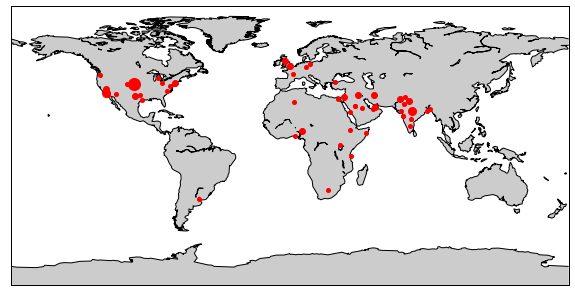

In [35]:
loc_visualize(cities,60)

## Exercise 4: Visualize the locations of IST followers.
Here you are required to complete the following code to visualize the locations of IST twitter followers(@ISTatPENNSTATE).
<br> IST currently have around 9151 followers.


In [37]:
screen_name = "ISTatPENNSTATE"
# TODO: 1. Fill the code of collecting all follower IDs
IST_followers_ids = []
for followers_id in tweepy.Cursor(api.followers_ids,screen_name=screen_name,count=5000).items():
    IST_followers_ids.append(followers_id)
print("the number of obtained followers ids is: {}".format(len(IST_followers_ids)))

the number of obtained followers ids is: 9530


In [41]:
IST_followers_chunks = split2chunks(IST_followers_ids)
IST_followers = []

# 2. Fill the code of collecting the profiles
for i,chunk in enumerate(IST_followers_chunks):
        IST_followers += api.lookup_users(chunk)
        print("{} chunks has been processed".format(i))
    
print("{} follower profiles has been attained".format(len(IST_followers)))

0 chunks has been processed
1 chunks has been processed
2 chunks has been processed
3 chunks has been processed
4 chunks has been processed
5 chunks has been processed
6 chunks has been processed
7 chunks has been processed
8 chunks has been processed
9 chunks has been processed
10 chunks has been processed
11 chunks has been processed
12 chunks has been processed
13 chunks has been processed
14 chunks has been processed
15 chunks has been processed
16 chunks has been processed
17 chunks has been processed
18 chunks has been processed
19 chunks has been processed
20 chunks has been processed
21 chunks has been processed
22 chunks has been processed
23 chunks has been processed
24 chunks has been processed
25 chunks has been processed
26 chunks has been processed
27 chunks has been processed
28 chunks has been processed
29 chunks has been processed
30 chunks has been processed
31 chunks has been processed
32 chunks has been processed
33 chunks has been processed
34 chunks has been proce

2368 unique locations found in their profiles


/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


we have attained 20 geocodes
we have attained 40 geocodes
we have attained 60 geocodes


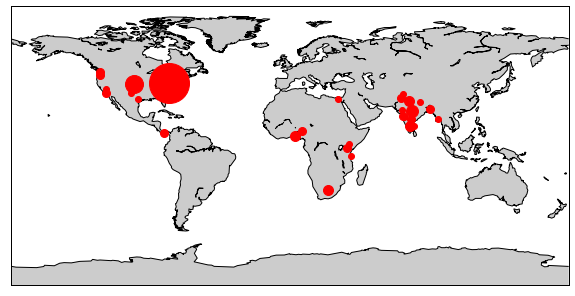

In [42]:
# run this cell to visualize the most 60 frequent locations
from collections import Counter
cities = Counter()
for follower in IST_followers:
    if(follower.location):
        cities.update([follower.location])
print("{} unique locations found in their profiles".format(len(cities)))

loc_visualize(cities,60)

# 2.4 Get user timeline
Get timelilne with id/user_id/screen_name, we can set the **count from 0 to 100.**

In [36]:
screen_name = "realDonaldTrump"
timeline = api.user_timeline(screen_name=screen_name, count=100) 
print("The number of timeline we collect is {}".format(len(timeline)))
for status in timeline:
    print(status._json['text'])

The number of timeline we collect is 100
Pelosi and Schumer want Trillions of Dollars of BAILOUT money for Blue States that are doing badly, both economical… https://t.co/8H3MwqYbjy
https://t.co/e6hYumwZWq
RT @WhiteHouse: LIVE: President @realDonaldTrump presents the Medal of Honor https://t.co/ltmHF3ORyW
https://t.co/UzvOvWyfIz https://t.co/9ASB2cBIPY
https://t.co/pF6ekCrWD3
https://t.co/8FH5zIBn02 https://t.co/MGyEETGNAl
Another HISTORIC breakthrough today! Our two GREAT friends Israel and the Kingdom of Bahrain agree to a Peace Deal… https://t.co/pXwAaMbITD
Joint Statement of the United States, the Kingdom of Bahrain, and the State of Israel https://t.co/xMquRkGtpM
https://t.co/AXhNnDe8jG
RT @WhiteHouse: "In New York, Arlington, and Shanksville, people raced into the suffocating smoke and rubble...

More than 400 first respon…
RT @WhiteHouse: "When terrorists raced to destroy the seat of our democracy, the 40 of Flight 93 did the most American of things—they took…
RT @WhiteHouse: Th

## Exercise 5: get the most recent 100 tweets of IST twitter (@ISTatPENNSTATE) using the timeline

In [43]:
screen_name = "ISTatPENNSTATE"
timeline = api.user_timeline(screen_name=screen_name, count=100) 
print("The number of timeline we collect is {}".format(len(timeline)))
for status in timeline:
    print(status._json['text'])

The number of timeline we collect is 100
✅ Get involved at #PennState as a student.
✅ Continue that strong engagement as an alum

Isabella Webster '20 was a… https://t.co/GlxaI2Kp0I
The center promotes high-impact, transformative #AI research and development, while encouraging the consideration o… https://t.co/4md1pyKbSs
Reminder: Dean's Town Hall for IST Students this afternoon! https://t.co/Q4F9kaGmWa
RT @psutlt: Join us this morning to learn how to more effectively teach students in-person and remotely at the same time via Zoom. "Engagin…
Resume Revamp starts in less than 30 minutes! Have your resume reviewed virtually by an IST Corporate Associate par… https://t.co/sVcnGDi9HD
@wondersmith_rae Congrats!
Dr. Sears will be joined tomorrow by Zoe Meyer, director of career solutions, with pandemic-related information as… https://t.co/ZyqPnLkIB1
📢 TODAY! IST alumni will be available virtually from 4-7:30 pm to help with mock interviews and resume reviews, and… https://t.co/dQn3mGXLiB
Lot